In [ ]:
# çalışma zamanını T4 GPU olarak değiştir.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import os
colac_path = "drive/MyDrive"
os.chdir(colac_path)

In [2]:
!pwd

/content/drive/MyDrive


In [3]:
# dosya yolu değiştirildi ve yapılan değişimler bu dosyaya kaydedilmesi sağlandı.
%cd /content/drive/MyDrive/pothole-detection

/content/drive/MyDrive/pothole-detection


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wl8kDsUd7bSy7ZBthdzH")
project = rf.workspace("moinfaisal").project("potholes-detection-yolonas")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


In [5]:
import glob #dosya işlemleri için

In [7]:
from IPython.display import Image,display

In [8]:
from IPython import display

In [9]:
!nvidia-smi

Mon Mar 11 19:40:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 4.7 MB/s eta 0:00:00


In [11]:
import ultralytics
ultralytics.checks() #GPU'ya bağlanıp bağlanmadığını kontrol edebiliriz.

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [ ]:
# data.yaml dosyası içinde names yani tespit edilecek nesnelerin isimleri yazıldı.
# çukur tespiti yapılacak
# train, test ve validation görüntülerinin dosya yolları yazıldı.

In [15]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/data.yaml epochs=70  imgsz=640

100% 49.7M/49.7M [00:00<00:00, 151MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

In [ ]:
# eğer eğitim yarıda kesilseydi ve tekrardan kaldığımız yerden devam etmek isteseydik,
# !yolo task=detect mode=/content/drive/MyDrive/pothole-detection/runs/detect/train/weights/last.pt resume=True
# kaldığı yerden devam etmesini sağları.

In [16]:
!ls /content/drive/MyDrive/pothole-detection/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1710186959.41b705face7c.5220.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5220.jpg  weights
P_curve.png					    train_batch5221.jpg
PR_curve.png					    train_batch5222.jpg


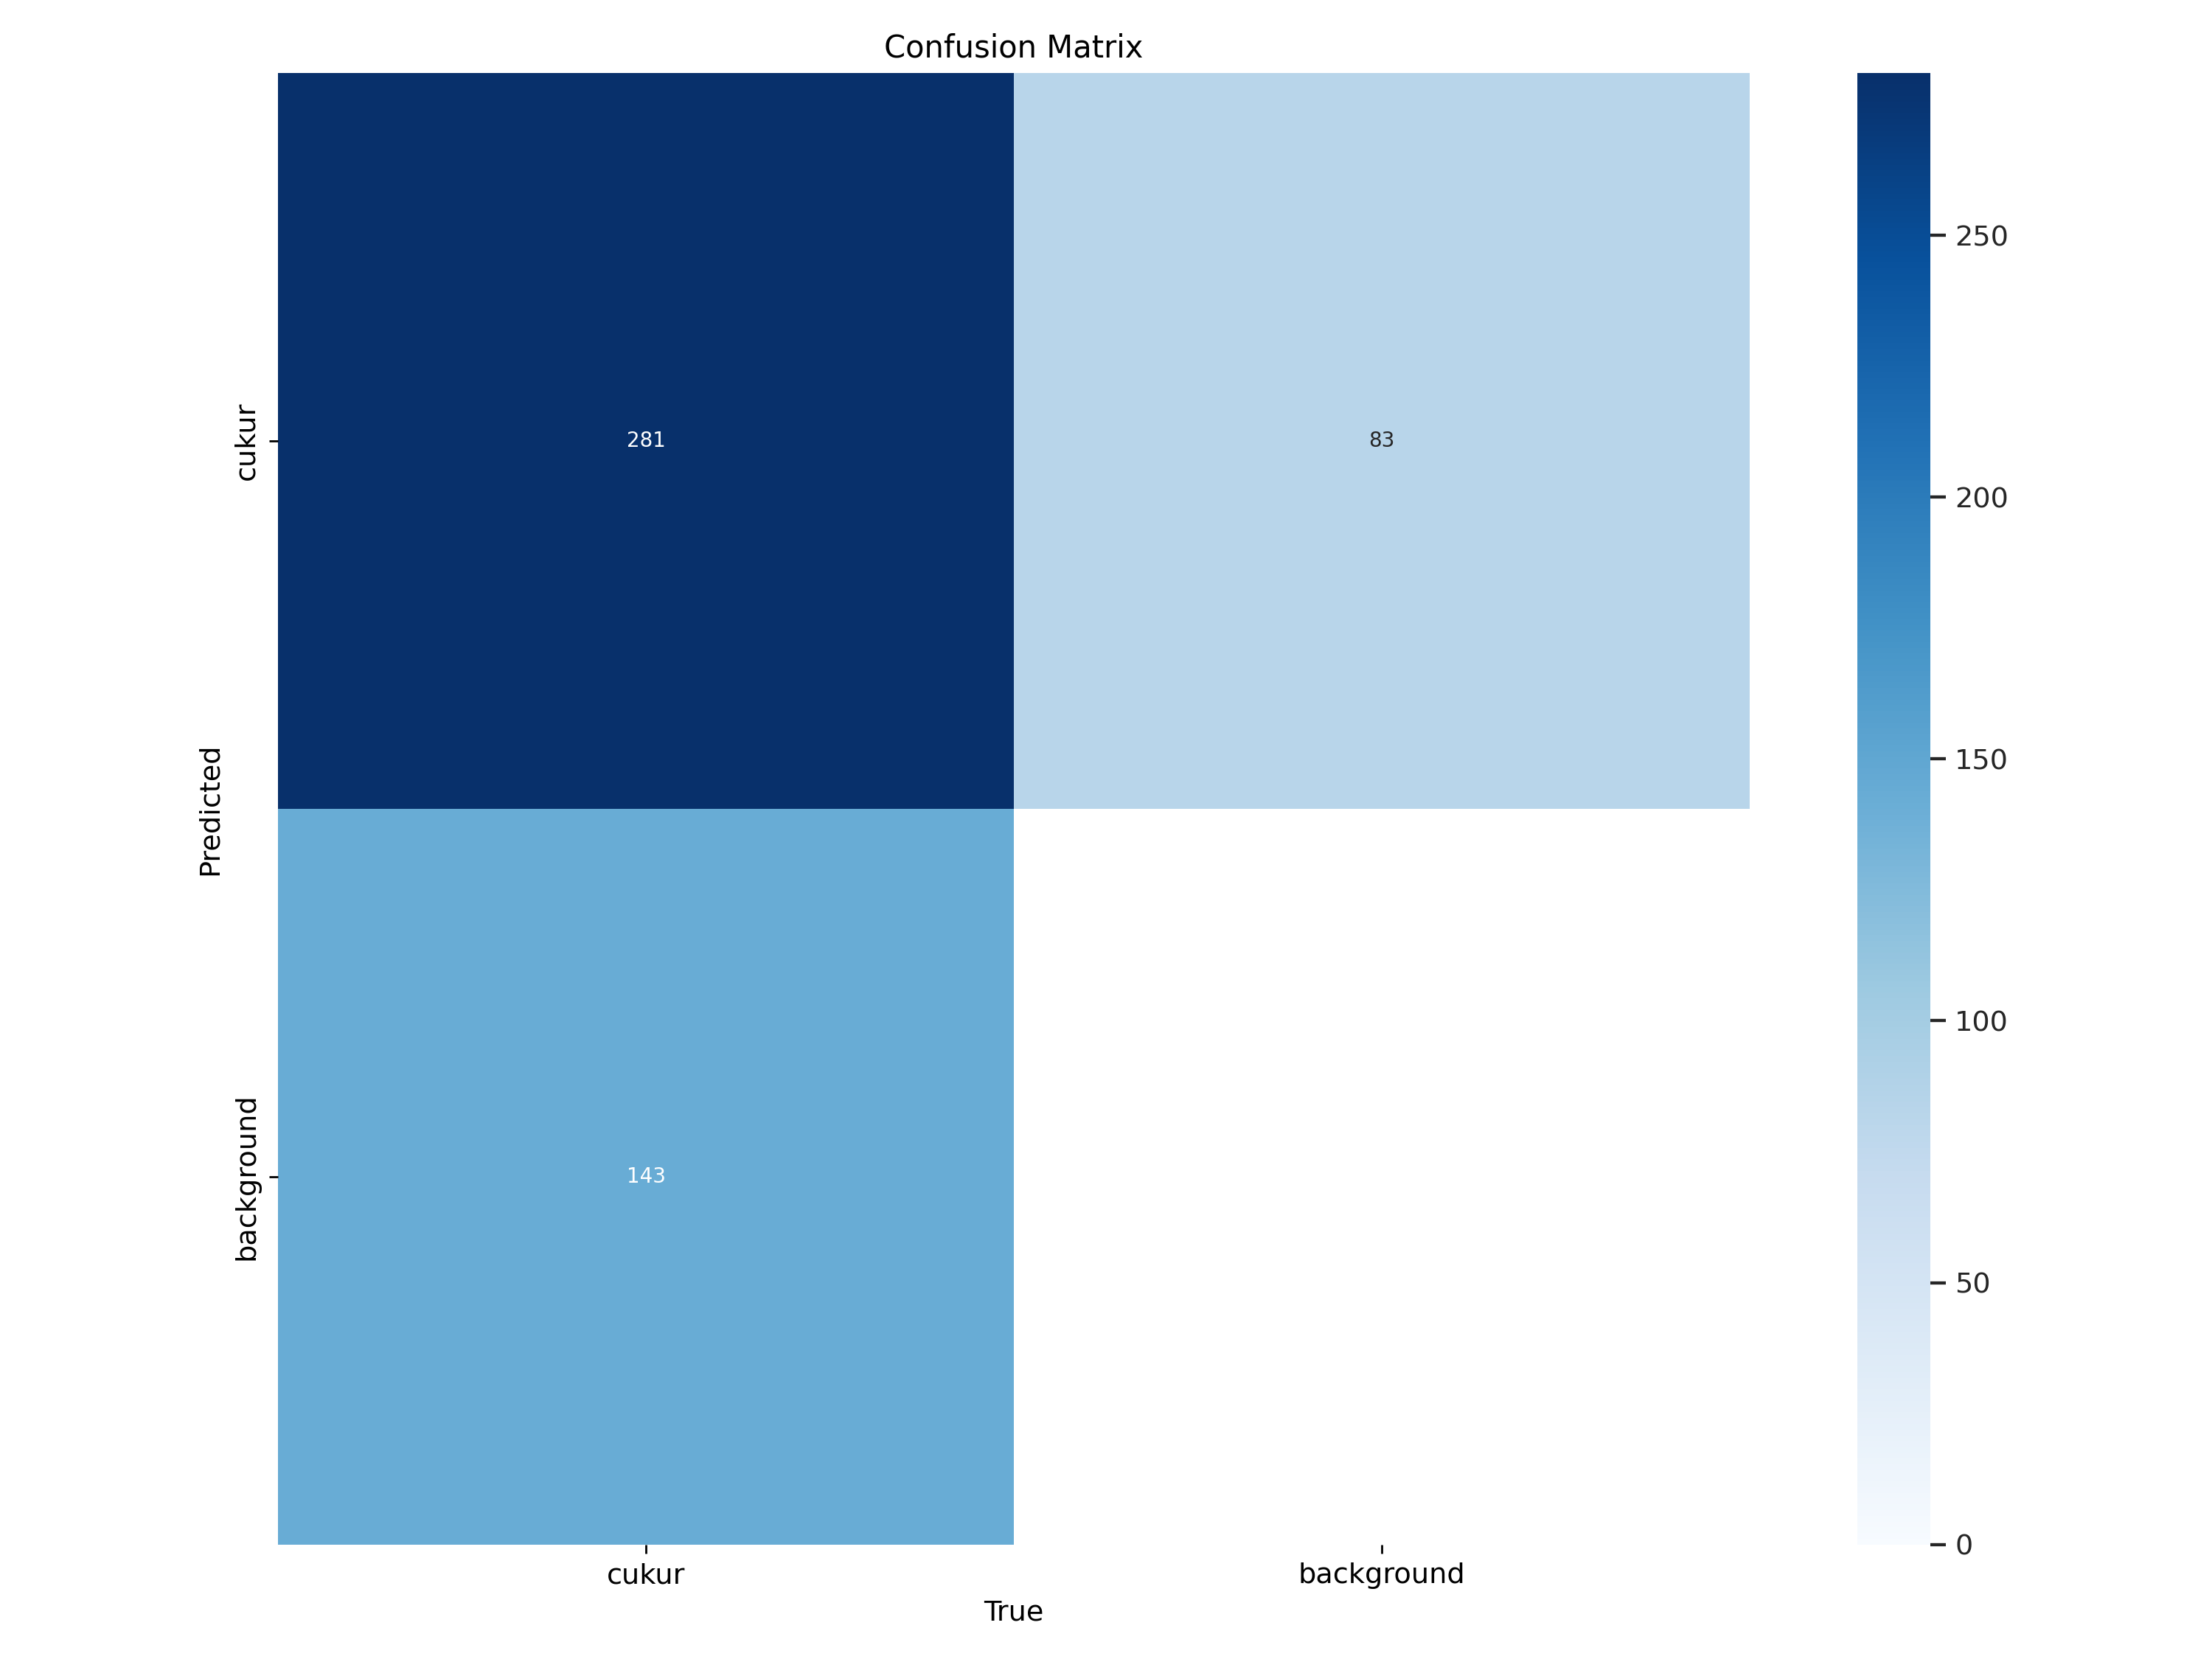

In [18]:
Image(filename=f"/content/drive/MyDrive/pothole-detection/runs/detect/train/confusion_matrix.png", width=800)

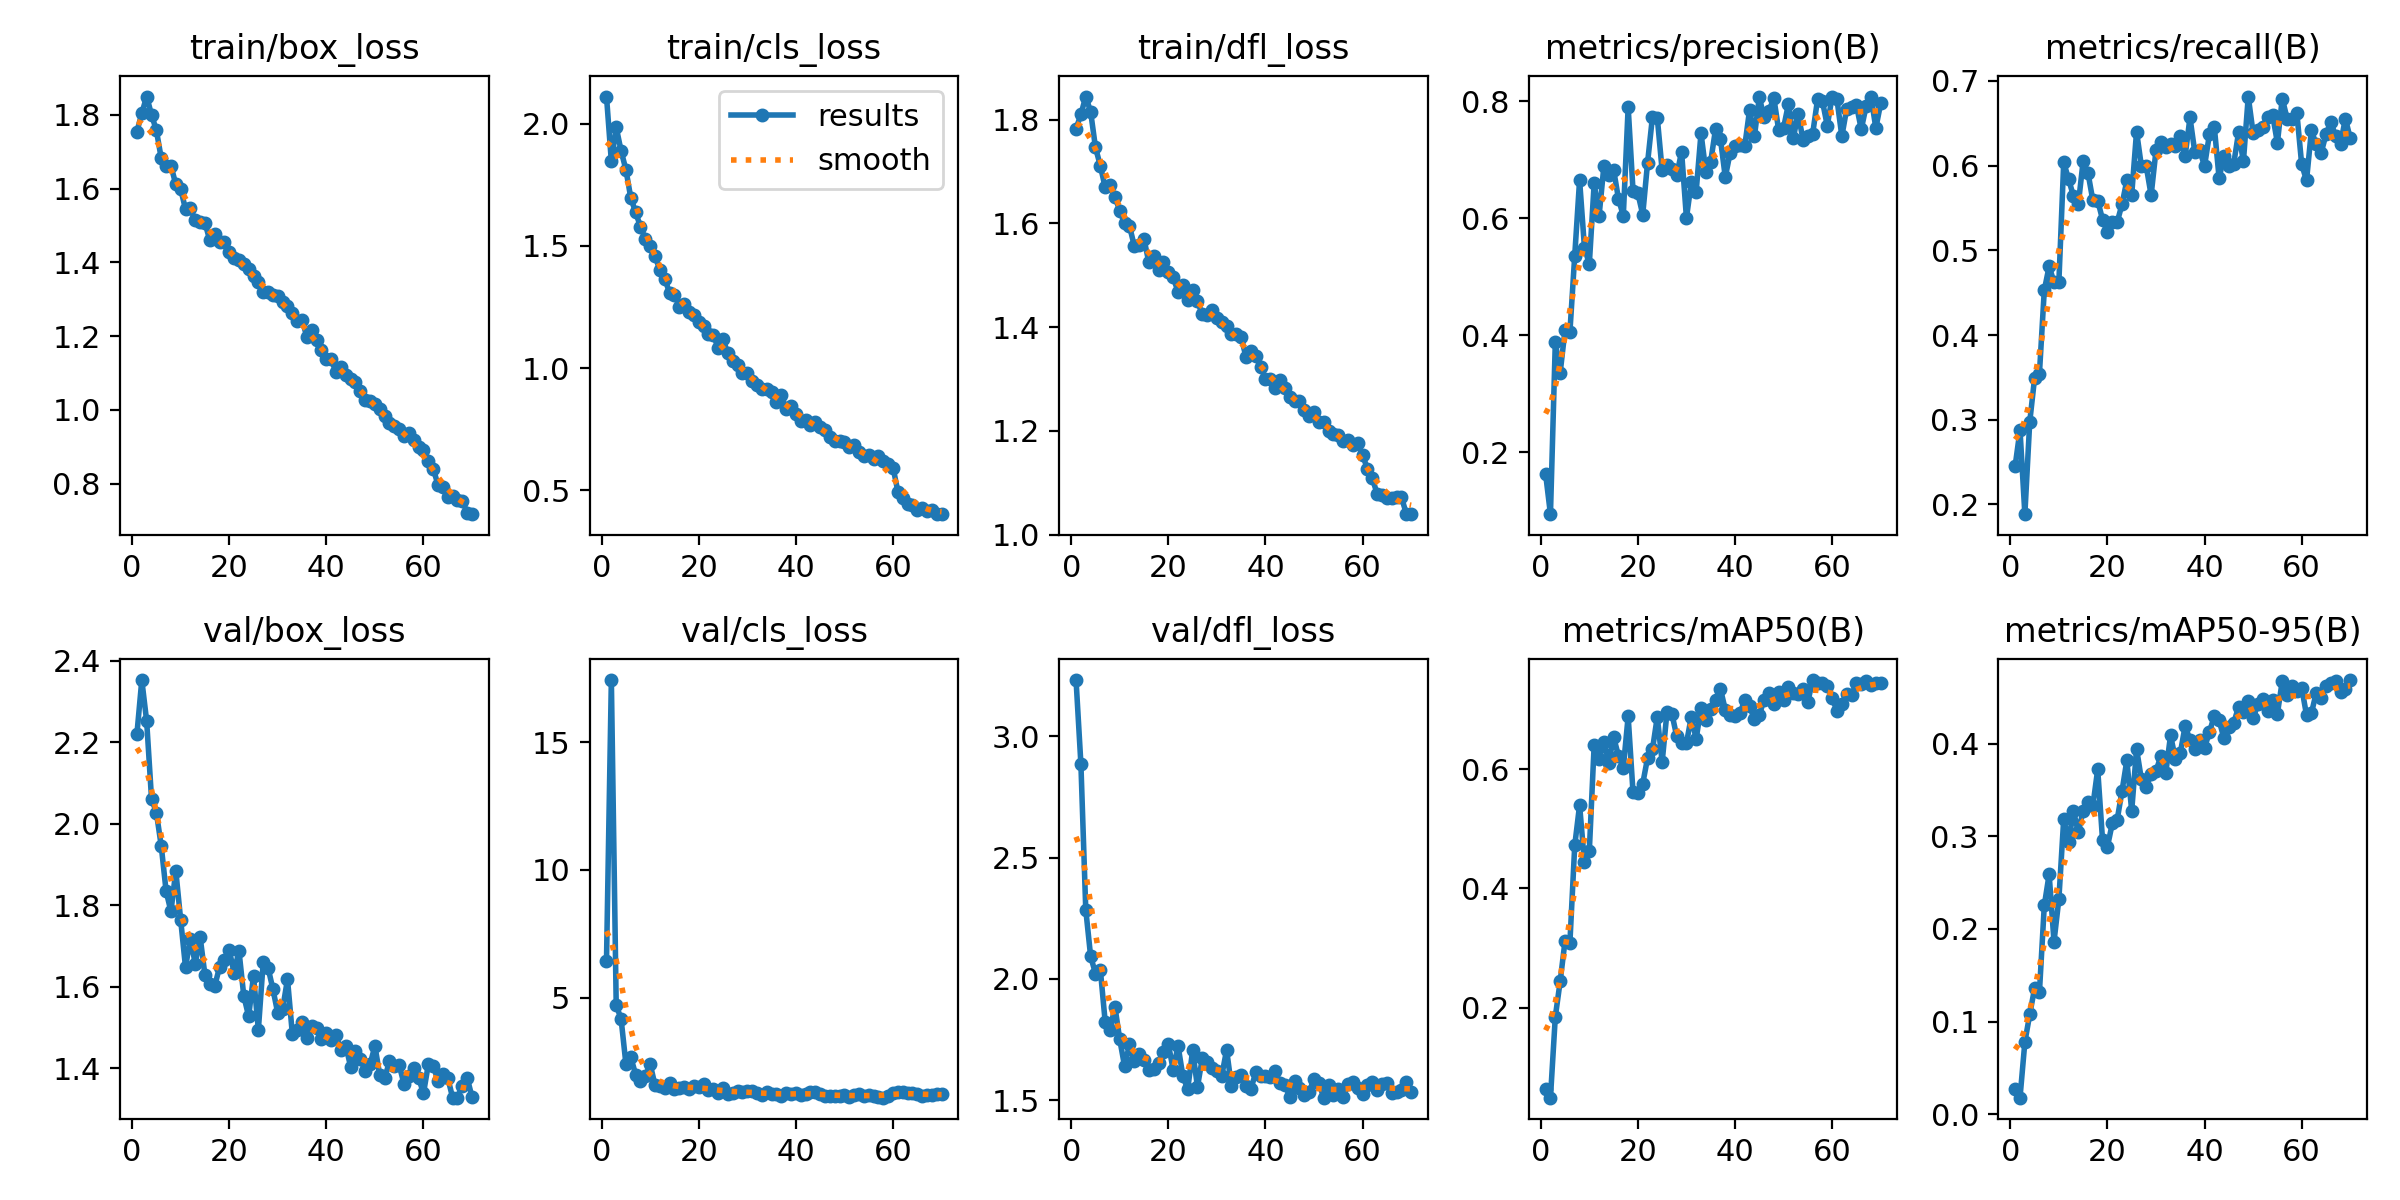

In [19]:
Image(filename=f"/content/drive/MyDrive/pothole-detection/runs/detect/train/results.png", width=800)

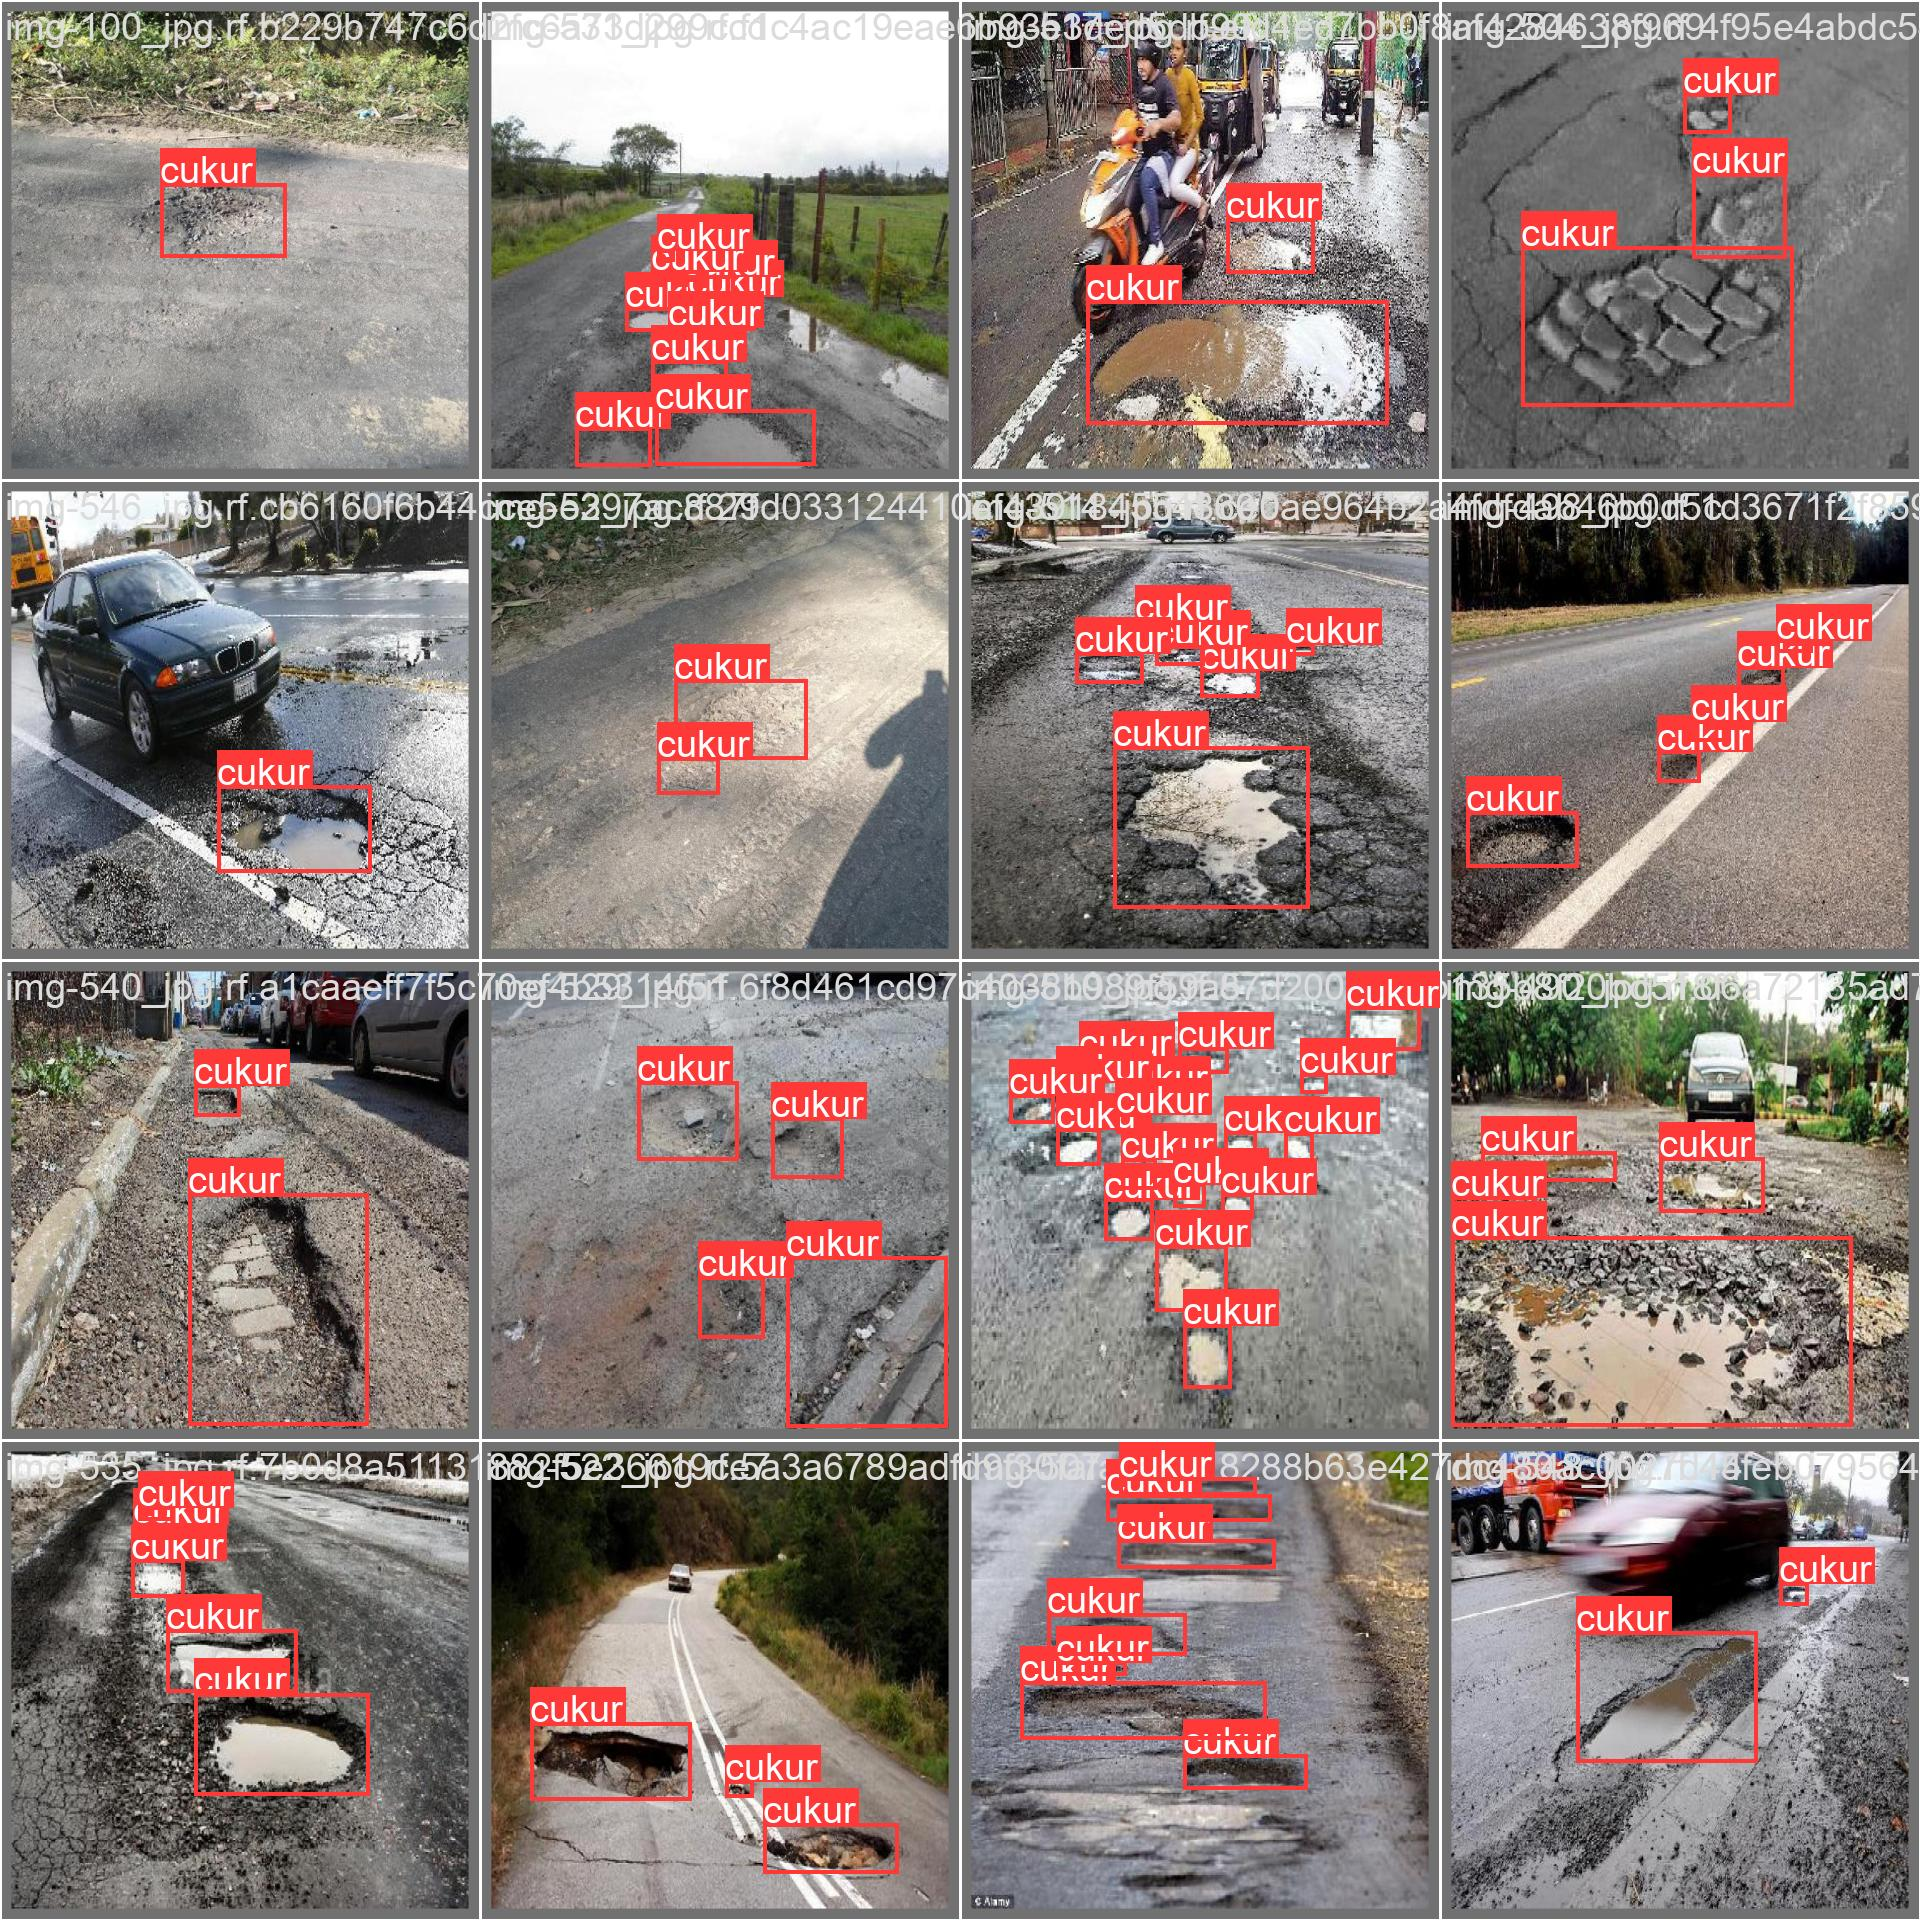

In [20]:
Image(filename=f"/content/drive/MyDrive/pothole-detection/runs/detect/train/val_batch0_labels.jpg", width=800)

In [22]:
!yolo task=detect mode=val model="/content/drive/MyDrive/pothole-detection/runs/detect/train/weights/best.pt" data=/content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/data.yaml

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100% 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:07<00:00,  1.16it/s]
                   all        135        424      0.785      0.639       0.74      0.469
Speed: 1.9ms preprocess, 21.7ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
# validation işlemini yapmış olduk.

In [24]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/pothole-detection/runs/detect/train/weights/best.pt" source=/content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/67 /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images/img-113_jpg.rf.46d2fd7e9cde20708bd71397f29511ce.jpg: 640x640 1 cukur, 37.0ms
image 2/67 /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images/img-125_jpg.rf.96421b2b7b87aa6b9fae26a08bd32061.jpg: 640x640 2 cukurs, 37.1ms
image 3/67 /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images/img-144_jpg.rf.5c4f8c972ec2ebae9dcea6a6b621c1aa.jpg: 640x640 2 cukurs, 37.4ms
image 4/67 /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images/img-159_jpg.rf.535dfd47122a273c46ed35bb8c57e847.jpg: 640x640 3 cukurs, 37.0ms
image 5/67 /content/drive/MyDrive/pothole-detection/potholes-detection-yolonas-5/test/images/img-183_jpg.rf.f262d4a8e00e309f1e81c5eaf31ce8a2.jpg: 64

In [ ]:
# test işemini yapıyoruz, her bir resimde çukurları buluyoruz.

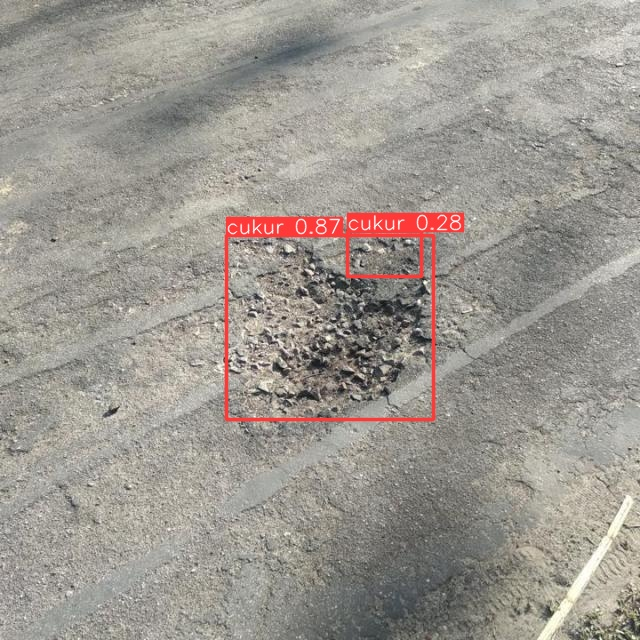

In [25]:
Image("/content/drive/MyDrive/pothole-detection/runs/detect/predict/img-185_jpg.rf.142f33877fd21972a1a592d6c9faf561.jpg")

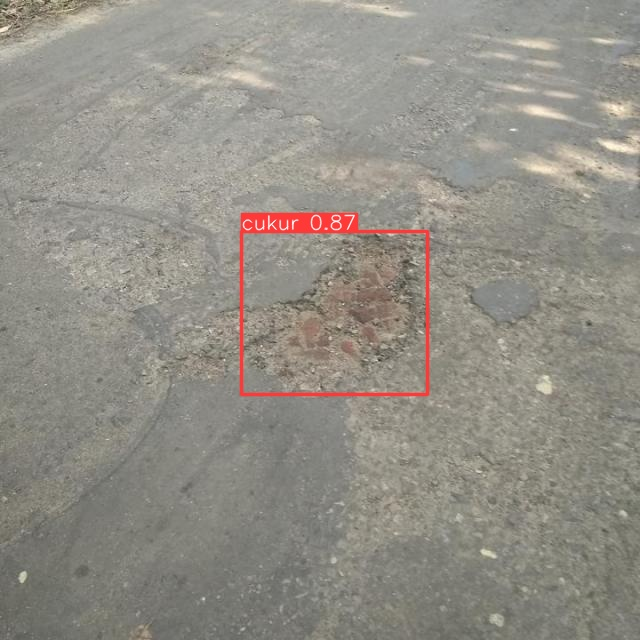

In [26]:
Image("/content/drive/MyDrive/pothole-detection/runs/detect/predict/img-212_jpg.rf.474026ff13a2ae105623d4d4a36d1354.jpg")